# Tải thư viện

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud
%pip install googletrans

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import datetime
from facebook_scraper import get_profile
from time import sleep
from ast import literal_eval
from googletrans import Translator

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
raw_df = pd.read_csv('Data/LordsMobileVN_clean.csv')


In [4]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [5]:
reactions

{'like': 54, 'love': 4, 'haha': 1, 'shares': 2, 'comments': 4}

## Phân tích Reactions

1. Phân tích sự phát triển lượt react theo ngày

In [6]:
post_df_1=raw_df
post_df_1[['post_id', 'reactions']]

,post_id,reactions
0,752698296898984,"{'like': 54, 'love': 4, 'haha': 1}"
1,744907481011399,"{'like': 97, 'haha': 25}"
2,745522664283214,"{'like': 130, 'love': 3, 'haha': 30, 'wow': 1,..."
3,752111686957645,"{'like': 91, 'love': 2, 'haha': 6}"
4,751732603662220,"{'like': 96, 'love': 2}"
...,...,...
195,688423049993176,"{'like': 183, 'love': 2, 'haha': 44, 'wow': 2,..."
196,686334866868661,"{'like': 96, 'love': 3, 'haha': 27, 'care': 1}"
197,687518510083630,"{'like': 176, 'love': 3, 'haha': 164, 'wow': 2..."
198,687500140085467,"{'like': 132, 'love': 7, 'haha': 1}"


In [7]:
post_df_2=raw_df[['time' ,'reaction_count']]
post_df_2

,time,reaction_count
0,2023-11-14 16:29:00,59
1,2023-11-14 08:00:00,122
2,2023-11-13 16:00:00,165
3,2023-11-13 10:23:14,99
4,2023-11-13 10:00:03,98
...,...,...
195,2023-08-04 11:14:35,234
196,2023-08-04 08:00:01,127
197,2023-08-03 16:00:02,350
198,2023-08-03 08:00:01,140


In [8]:
post_df_2['time'] = pd.to_datetime(post_df_2['time'])
dates=post_df_2['time'].to_list()
y=post_df_2['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)

200 200
[Timestamp('2023-08-02 08:00:02'), Timestamp('2023-08-03 08:00:01'), Timestamp('2023-08-03 16:00:02'), Timestamp('2023-08-04 08:00:01'), Timestamp('2023-08-04 11:14:35'), Timestamp('2023-08-04 14:27:42'), Timestamp('2023-08-04 16:39:04'), Timestamp('2023-08-05 08:00:03'), Timestamp('2023-08-06 22:35:25'), Timestamp('2023-08-07 08:00:42'), Timestamp('2023-08-07 13:00:04'), Timestamp('2023-08-07 17:46:52'), Timestamp('2023-08-08 08:00:02'), Timestamp('2023-08-09 08:00:02'), Timestamp('2023-08-09 13:21:03'), Timestamp('2023-08-10 10:27:12'), Timestamp('2023-08-10 12:30:00'), Timestamp('2023-08-11 10:00:00'), Timestamp('2023-08-11 12:01:06'), Timestamp('2023-08-11 15:00:01'), Timestamp('2023-08-12 08:00:00'), Timestamp('2023-08-13 08:00:00'), Timestamp('2023-08-14 08:00:00'), Timestamp('2023-08-14 14:47:00'), Timestamp('2023-08-14 15:23:00'), Timestamp('2023-08-15 09:30:00'), Timestamp('2023-08-15 12:53:00'), Timestamp('2023-08-16 10:02:00'), Timestamp('2023-08-16 12:23:00'), Times

C:\Users\nhuyh\AppData\Local\Temp\ipykernel_15688\2221346998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_2['time'] = pd.to_datetime(post_df_2['time'])


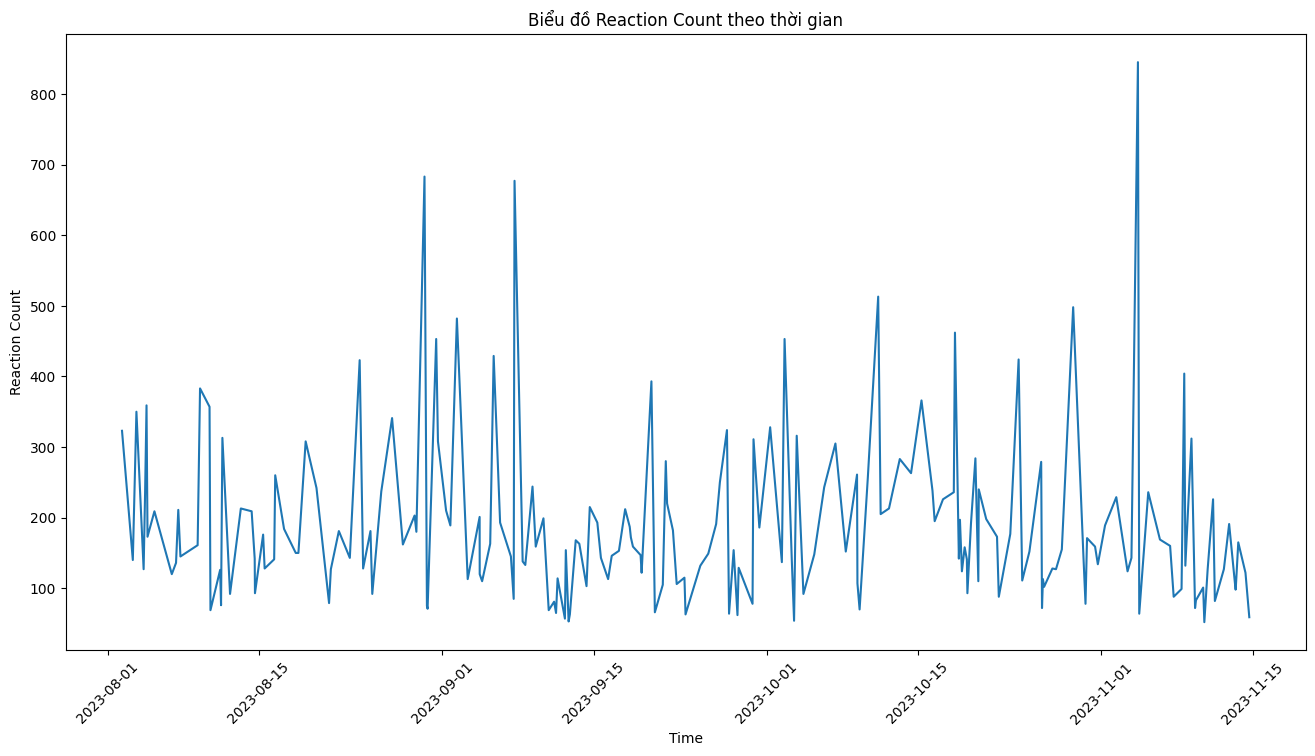

In [9]:
# biểu đồ thể hiện hiệu xuất reaction cout của các bài đăng theo thời gian
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Reaction Count')
plt.title('Biểu đồ Reaction Count theo thời gian')
plt.plot(dates,y)
plt.show()

2. Phân tích từng loại lượt reaction theo ngày

In [10]:
post_df_1['reactions'] = post_df_1['reactions'].apply(lambda x : dict(eval(x)) )
df_reactions = post_df_1['reactions'].apply(pd.Series )

C:\Users\nhuyh\AppData\Local\Temp\ipykernel_15688\4037589999.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df_reactions = post_df_1['reactions'].apply(pd.Series )


In [11]:
# gộp các cột lại vào dataframe
df_reactions = df_reactions.fillna(0)
post_df_1 = post_df_1.fillna(' ')
post_df_with_reactions = pd.concat([post_df_1, df_reactions], axis=1).drop('reactions', axis=1)
post_df_with_reactions[['post_id','post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]

,post_id,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,752698296898984,Sự hợp tác hoành tráng giữa Lords Mobile x Arm...,54.0,4.0,1.0,0.0,0.0,0.0,0.0,2,4,59
1,744907481011399,"🥹 Không có so sánh, không có đau thương",97.0,0.0,25.0,0.0,0.0,0.0,0.0,1,17,122
2,745522664283214,"Hồi xưa thấy bình thường ha, giờ thì quý lắm l...",130.0,3.0,30.0,1.0,1.0,0.0,0.0,0,22,165
3,752111686957645,,91.0,2.0,6.0,0.0,0.0,0.0,0.0,0,17,99
4,751732603662220,🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\r\n▪...,96.0,2.0,0.0,0.0,0.0,0.0,0.0,1,244,98
...,...,...,...,...,...,...,...,...,...,...,...,...
195,688423049993176,Mời các nông dân vườn khoai trả lời ạ !,183.0,2.0,44.0,2.0,2.0,1.0,0.0,0,79,234
196,686334866868661,"Sau bao nhiêu năm, người đàn ông tôi cần nhất ...",96.0,3.0,27.0,0.0,0.0,0.0,1.0,1,43,127
197,687518510083630,🧑‍⚕️ Nào mình cùng đến thăm bệnh nhân tại Thán...,176.0,3.0,164.0,2.0,3.0,0.0,2.0,1,57,350
198,687500140085467,Chào tháng 8 cùng nhiều sự kiện hấp dẫn diễn r...,132.0,7.0,1.0,0.0,0.0,0.0,0.0,1,27,140


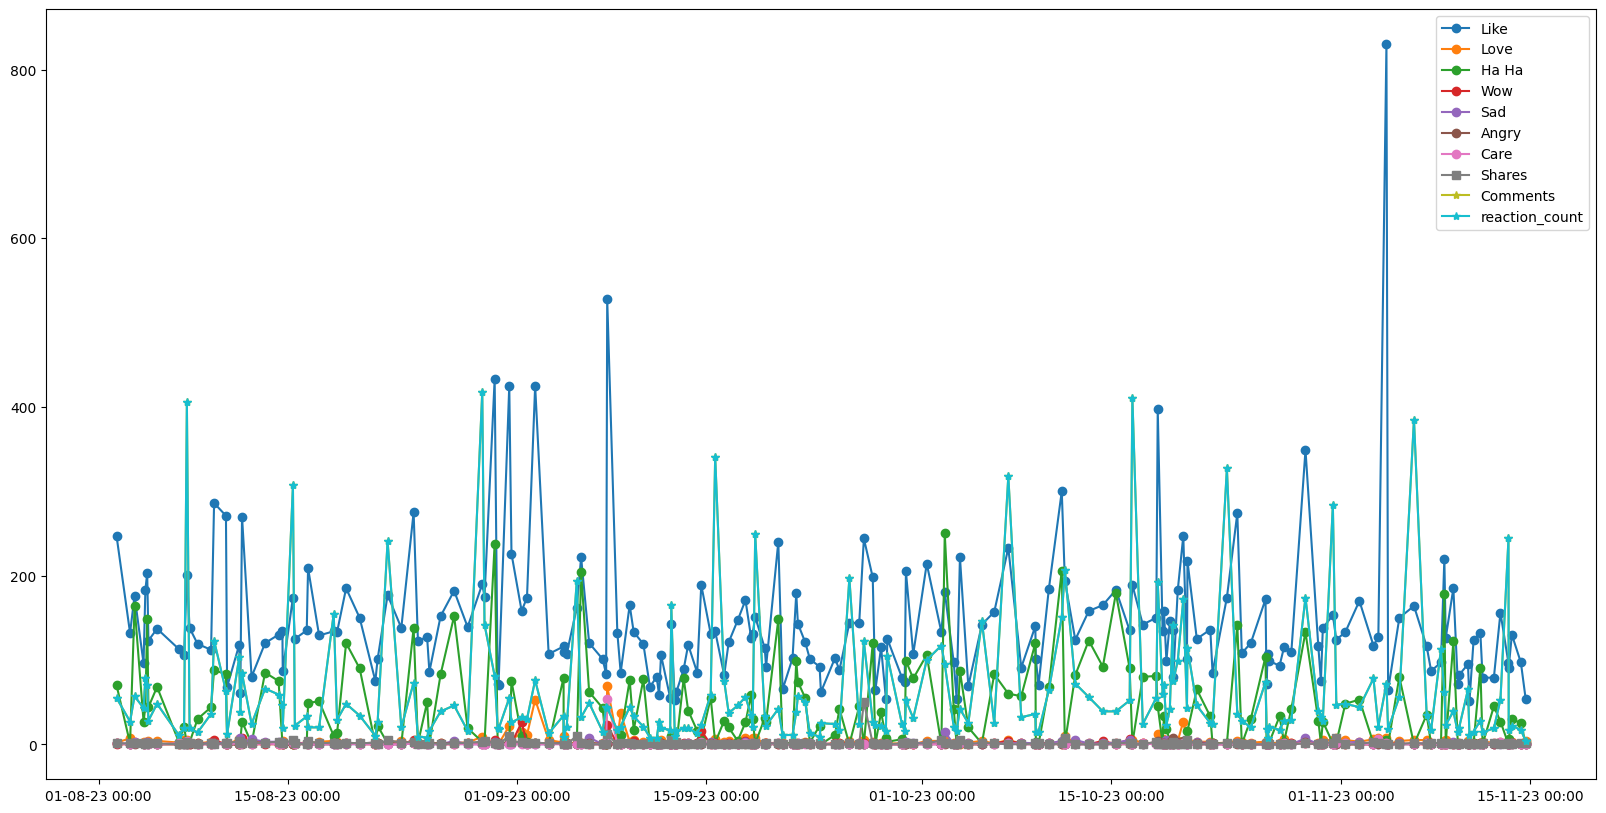

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
post_df_with_reactions['time'] = pd.to_datetime(post_df_with_reactions['time'])
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['like'], label = "Like", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['love'], label = "Love", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['sad'], label = "Sad", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['angry'], label = "Angry", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['care'], label = "Care", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['comments'], label = "reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

3. Tổng từng loại reaction

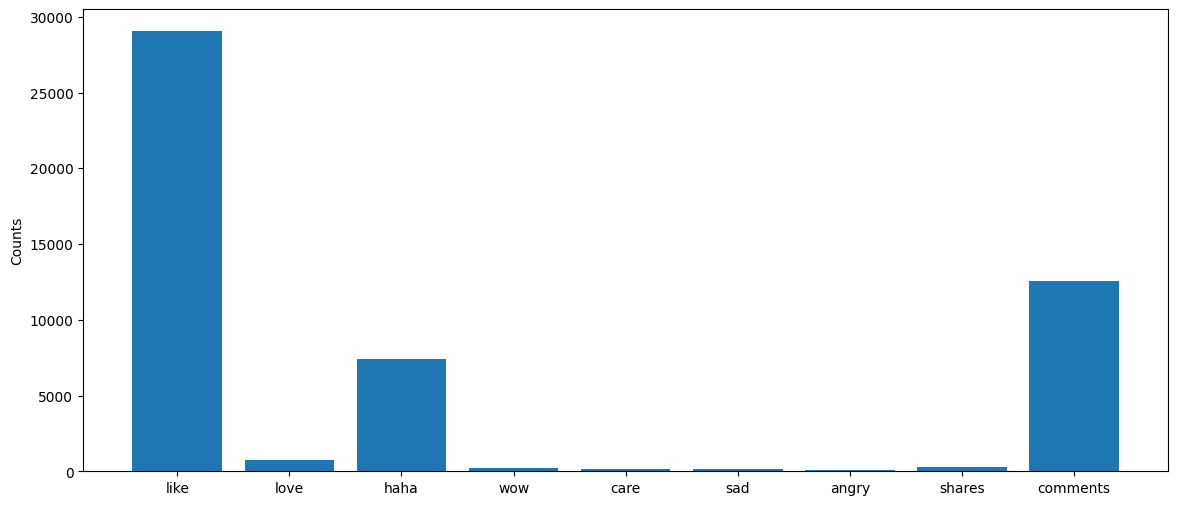

In [13]:
total_reactions = post_df_with_reactions[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry', 'shares', 'comments']].sum()
plt.figure(figsize=(14, 6))

plt.bar(total_reactions.index, total_reactions.values)

plt.ylabel('Counts')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

4. Tỉ lệ các loại reaction

In [14]:
# Tổng các cảm xúc có số lượng ít
df_reactions['total residual emotions'] = df_reactions['care'] + df_reactions['sad'] + df_reactions['angry'] +df_reactions['wow']

In [15]:
total_reactions = df_reactions[['like', 'love', 'haha', 'total residual emotions']].sum()

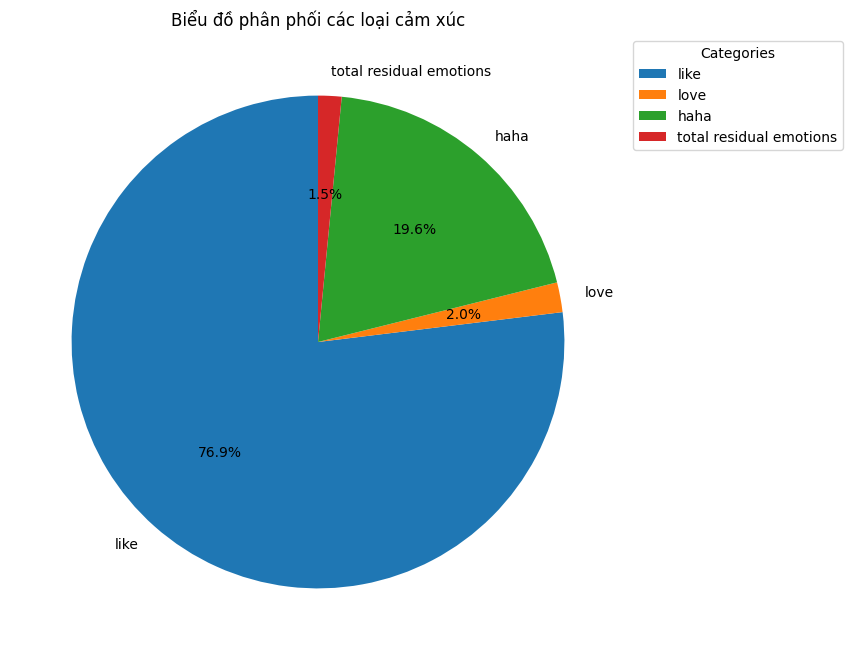

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(total_reactions.values, labels=total_reactions.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ phân phối các loại cảm xúc')
plt.legend(title="Categories", bbox_to_anchor=(1, 1))
plt.show()

5. Sự tương quan giữa số lượng reactions với các trường khác như số lượng bình luận, độ dài bài viết,..

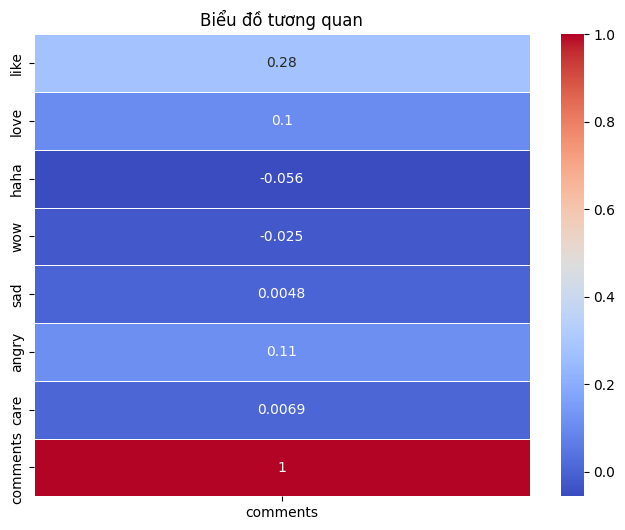

In [17]:
data_reations = post_df_with_reactions[['like', 'love', 'haha', 'wow', 'sad', 'angry', 'care', 'comments']]

# Tính ma trận tương quan
data_for_corr = data_reations.corr()

# Lấy ma trận tương quan của 'comments' với các biến khác
correlation_with_comments = data_for_corr['comments'].to_frame()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_comments, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Biểu đồ tương quan")
plt.show()

# Xử lí Reactors

In [18]:
def get_reactors(text):
    pattern = r"\{[^{}]*\}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result

In [19]:
def createReactorsFrame(df):
    df_result = {'name' : [],
                 'link' : [],
                   'type' : [],}
    
    new_df = raw_df[~raw_df['reactors'].isna()]
    for index, rows in new_df.iterrows():
        x = rows['reactors']
        for reactor in get_reactors(x):
            try:
                df_result['name'].append(reactor['name'])
                df_result['link'].append(reactor['link'])
                df_result['type'].append(reactor['type'])
                df_result['post_id'].append(rows.post_id)
            except:
                continue
    return pd.DataFrame(df_result)

In [20]:
df_reactors = createReactorsFrame(raw_df)
df_reactors

,name,link,type
0,Thành Đạt,https://facebook.com/profile.php?id=1000953464...,like
1,Sáng Pvs,https://facebook.com/profile.php?id=1000952600...,like
2,Tatt Thgg,https://facebook.com/profile.php?id=1000940027...,like
3,Huynh Ngọc,https://facebook.com/profile.php?id=1000900083...,like
4,Nguyễn Phước,https://facebook.com/profile.php?id=1000897938...,like
...,...,...,...
10013,Nguyễn Thiên Phúc,https://facebook.com/profile.php?id=1000734772...,haha
10014,Trần Đăng,https://facebook.com/profile.php?id=1000734275...,like
10015,Ngọc Gemma,https://facebook.com/profile.php?id=1000930930...,like
10016,Vishal Singh,https://facebook.com/profile.php?id=1000919021...,like


In [21]:
# Tạo một list_link rỗng
list_link = []

# Thêm danh sách vào list_link
list_link.extend(df_reactors['link'])

# In danh sách
print(list_link)


['https://facebook.com/profile.php?id=100095346420738&eav=AfYxUHu5ZORKc5z2wWRHMTyhUlLw0JKZBA2yMui2zlKP7AHnSWru14G7cdfo6s0kv_4&fref=pb&paipv=0', 'https://facebook.com/profile.php?id=100095260084244&eav=AfZKN50pDUr5SKVmPx-Wfs5EAo1AMcIsFjRFCFIezgJGTgMzXv1D1C2I28JCD1-xbrA&fref=pb&paipv=0', 'https://facebook.com/profile.php?id=100094002746839&eav=AfYX7z8NlBN_FuvySTvtXctzXtfq_oSV4gJlUjASFNoLC1xmAPSvcGRe383kpwplMCc&fref=pb&paipv=0', 'https://facebook.com/profile.php?id=100090008395420&eav=AfZuGaMEq9J01wyl9Na57DawL4stIdZQ7nl1GS4yNoJNKYDpFu66zU8X1eFE9vipLcc&fref=pb&paipv=0', 'https://facebook.com/profile.php?id=100089793861463&eav=AfaQWV3sB2X2cVevAw5tEa86RDH2zIHxZd4XGHJxeCHP-PfznxPmvqtCD1aVH2Y8u-I&fref=pb&paipv=0', 'https://facebook.com/profile.php?id=100088379217721&eav=AfYhwnnntoFVS_rdHK7fVjWh2O6k5cDtywYS1yI6H3ira3064J0ZkTVM_Yq-JFl5Puo&fref=pb&paipv=0', 'https://facebook.com/amater.org?eav=AfY8P74VhWBCN-IT38MQrCUnSgQVatyCFEQfrI1tZ2avnrgRrgL5NQGYNFGGDh0ZSAo&fref=pb&paipv=0', 'https://facebook.

In [22]:
list_link = [link[link.rfind('/') + 1:] for link in list_link]

In [23]:
reactors = []
for link in list_link:
    try:
        user = get_profile(link)
        reactors.append(user)
        print(f"{len(reactors)} {user}")
    except:
        continue

1 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Không tìm thấy nội dung'}
2 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Không tìm thấy nội dung'}
3 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Không tìm thấy nội dung'}
4 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Không tìm thấy nội dung'}
5 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Không tìm thấy nội dung'}
6 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Không tìm thấy nội dung'}
7 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Không tìm thấy nội dung'}
8 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Không tìm thấy nội dung'}
9 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Không tìm thấy nội dung'}
10 {'Friend_count':

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\facebook_scraper\facebook_scraper.py:855: UserWarning: Facebook language detected as vi_VN - for best results, set to en_US
  warnings.warn(


754 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo': 'https://scontent.fhan5-8.fna.fbcdn.net/v/t39.30808-6/405249372_761430416025772_3840604300435494569_n.png?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=ff2d77&_nc_ohc=R2bhAxjrmH0AX9mpdbX&_nc_ht=scontent.fhan5-8.fna&oh=00_AfCiD4LMy_RI_fFE5E8Sg38U7tzy0DHlBP2IktlSroFemA&oe=6572322D', 'profile_picture': 'https://scontent.fhan15-2.fna.fbcdn.net/v/t39.30808-1/406234928_762403185928495_7885415226063953522_n.jpg?stp=c86.86.340.340a_cp0_dst-jpg_e15_q65_s120x120&_nc_cat=104&ccb=1-7&_nc_sid=4da83f&_nc_ohc=X_2n88H9ookAX8faH4n&_nc_ht=scontent.fhan15-2.fna&oh=00_AfDRiAdaIL3B7wTX47ikEUVnBobhaYYi69UkQchIQbSQIQ&oe=65734A4B', 'id': '100064764606324', 'Name': 'Lords Mobile', 'Giới thiệu về Lords Mobile': 'Hãy sẵn sàng để bước vào thế giới hỗn loạn của LordsMobile - game chiến thuật chiến đấu thời gian thực hàng đầu với đồ họa 3D đỉnh cao của IGG!'}
755 {'Friend_count': None, 'Follower_count': None, 'Follow

In [24]:
df_reactors = pd.DataFrame(reactors)

In [25]:
# xóa null
df_reactors = df_reactors.drop(['Friend_count', 'Follower_count', 'Following_count'], axis=1)

In [26]:
# Loop through all columns
for col in df_reactors.columns:
    # Check if the column name starts with 'Giới thiệu'
    if col.startswith('Giới thiệu'):
        mask = df_reactors[col].notna()
        intro = df_reactors.loc[mask, col].values[0]
        df_reactors.loc[mask, 'Introduction'] = intro
        # Break out of the loop since we only need to do this once
        print('Found ' + col)
        print(intro)
        print()
        df_reactors.drop(col, axis=1, inplace=True)

Found Giới thiệu về Lords Mobile
Hãy sẵn sàng để bước vào thế giới hỗn loạn của LordsMobile - game chiến thuật chiến đấu thời gian thực hàng đầu với đồ họa 3D đỉnh cao của IGG!

Found Giới thiệu về Trung
Giờ mới thấy mình simp đến mức nào uwu

Found Giới thiệu về Thái Nhí
Thái Điền Khôi

Found Giới thiệu về Nguyễn
- Hay hát, hay cười
- Không thể giận ai quá 1h
- Là một người vui vẻ, hòa đồng, hết mình vì gia đình và bạn bè



C:\Users\nhuyh\AppData\Local\Temp\ipykernel_15688\4093488894.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Hãy sẵn sàng để bước vào thế giới hỗn loạn của LordsMobile - game chiến thuật chiến đấu thời gian thực hàng đầu với đồ họa 3D đỉnh cao của IGG!' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_reactors.loc[mask, 'Introduction'] = intro


In [27]:
# Lọc dữ liệu nơi sống
df_reactors.loc[df_reactors['Nơi từng sống'].notna(),['Name','Nơi từng sống']]

,Name,Nơi từng sống
754,Mai Tứ Quý,Thủ Dầu Một\nTỉnh/Thành phố hiện tại
793,Lê Việt Hoàng,"Phu Tho, Phú Thọ, Vietnam\nTỉnh/Thành phố hiện..."
796,Phan Vũ,Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại...
847,Lục Minh Hải,Tuyên Quang\nTỉnh/Thành phố hiện tại\nSơn Dươn...
869,Kỉ Niệm,Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại...
871,Toan Ngvantoan,Cái Bè\nTỉnh/Thành phố hiện tại
881,An An,"An Khê, Gia Lai, Vietnam\nTỉnh/Thành phố hiện ..."
883,Lê Dương,Thành phố Hồ Chí Minh\nTỉnh/Thành phố hiện tại...
889,Thanh Nhân Tran,Tịnh Biên\nTỉnh/Thành phố hiện tại\nTịnh Biên\...
890,Ba le Quang,Tây Ninh\nTỉnh/Thành phố hiện tại


In [28]:
# Lọc dữ liệu học vấn
df_reactors.loc[df_reactors['Học vấn'].notna(), ['Name', 'Học vấn']]

,Name,Học vấn
793,Lê Việt Hoàng,THPT Hạ Hòa Confessions 3\nTrường trung học
847,Lục Minh Hải,Đại Học Buôn Ba\nCao đẳng/Đại học\nTrường THPT...
881,An An,"Trường THPT Quang Trung An Khê, Gia Lai\nTrườn..."
883,Lê Dương,Trường Đại học Luật Tp. Hồ Chí Minh\nLuật kinh...
885,Lê Hồng Phước,Đại học FPT Hà Nội\nSoftware Engineering and B...
888,Jimmy Jack,Shri Saraswati Vidyalaya\nTrường trung học
889,Thanh Nhân Tran,Đại Học FPT Cần Thơ\nCao đẳng/Đại học\nTHPT Xu...
891,Vong Chanh Khin,"Trường Đại học Công nghệ Thông tin, Đại học Qu..."
895,Quy Vo,Châu Thành 1-MỘT GÓC TRỜI RIÊNG\nTrường trung học
898,Nầrt Man Ihc,THPT Đồng Xoài\nTrường trung học


# Lấy dữ liệu về địa chỉ , quốc gia của người dùng

In [29]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Reactions")

def country(place):
    '''
    Get country of location
    '''
    sleep(2)
    # Handle some special case
    if "Huyện" in place:
        return country(place.split('Huyện')[1])
    if ',' in place:
        return country(place.split(', ')[-1])
    
    try:
        location = geolocator.geocode(place, language='en')
        return location.address.split(',')[-1]
    except:
        try:
            translator = Translator()
            location = geolocator.geocode(translator.translate(place, dest='en').text, language='en')
            return country(place)
        except:
            print("Error at", place)
        return 1

print(country("Hà Nội"))

 Vietnam


In [30]:
def extract_location(place):
    """Extract location from data string"""

    if place:
        place_str = str(place)
        location = place_str.split('\n')
        if len(location) < 3:
            return location[0], None
        else:
            return location[0], location[2]

    return None, None

In [31]:
df_reactors['location'] = df_reactors['Nơi từng sống'].apply(lambda x: extract_location(x)[0] if x else None)

In [32]:
df_reactors['country'] = df_reactors['location'].apply(lambda x: country(x) if x else None)

Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan


In [46]:
df_reactors.to_csv('Data/Reactors.xlsx', index=False)

In [52]:
df_reactors = pd.read_excel('Data/Reactors.xlsx')

<function matplotlib.pyplot.show(close=None, block=None)>

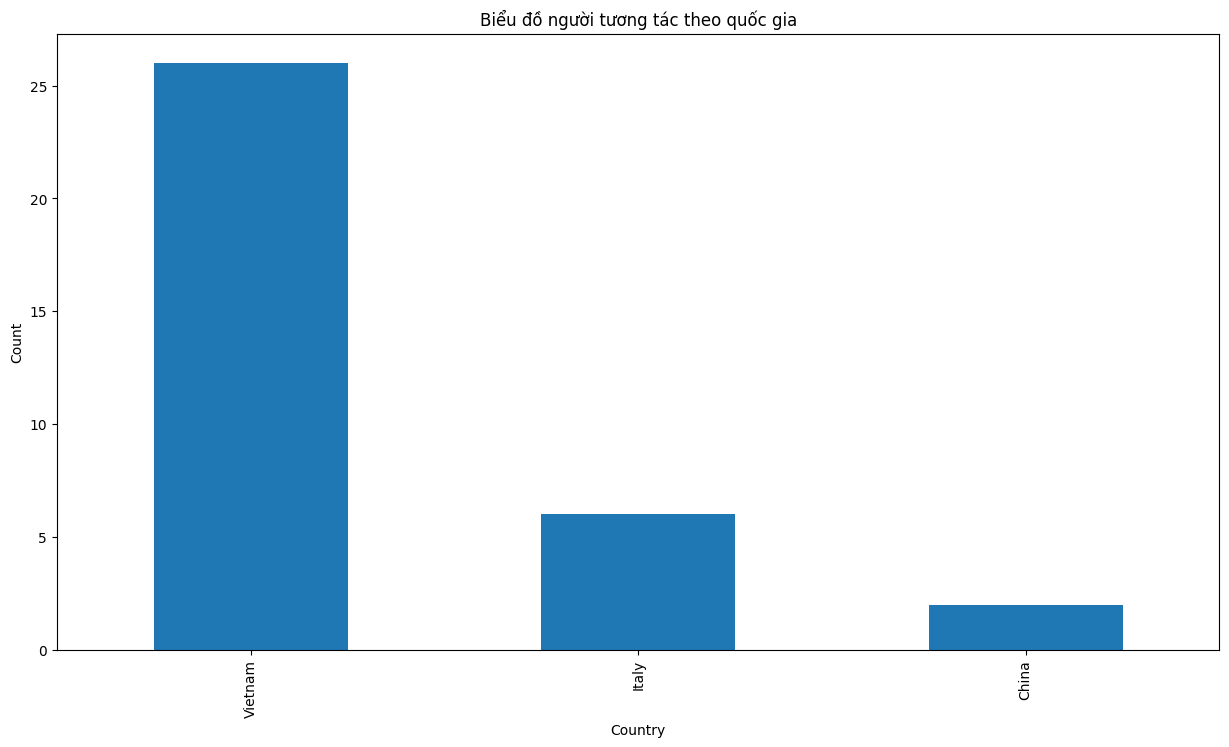

In [54]:
df_reactors['country'].value_counts().plot(kind='bar', figsize=(15,8))
plt.title('Biểu đồ người tương tác theo quốc gia')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show

Khảo sát học vấn người dùng

In [34]:
def classify_education(education):
  if isinstance(education, str):  
    if 'THPT' in education:
        return 'THPT'
    elif 'Đại học' in education:
        return 'Đại học'
    elif 'THCS' in education or 'Trung học cơ sở' in education:
        return 'THCS'
    elif 'Cao đẳng' in education:
        return 'Cao đẳng'
    elif 'University' in education:
        return 'Đại học'
    else:
        return 'Khác'  

df_reactors['Giáo Dục'] = df_reactors['Học vấn'].apply(classify_education)
df_reactors.dropna(subset=['Giáo Dục'], inplace=True)
df_reactors['Giáo Dục']

793        THPT
847        THPT
881        THPT
883     Đại học
885        THPT
888        Khác
889        THPT
891     Đại học
895        Khác
898        THPT
987        THPT
988        THPT
992     Đại học
1024       THPT
1081       THPT
1131       THPT
1132       THPT
1714       THPT
1716       THPT
1791    Đại học
1823       THPT
1843       THPT
1848       THPT
1858       THPT
1859    Đại học
1863       Khác
1864       THPT
1868    Đại học
1870    Đại học
1903    Đại học
1906       THPT
1909       THPT
2007    Đại học
2009       THPT
Name: Giáo Dục, dtype: object

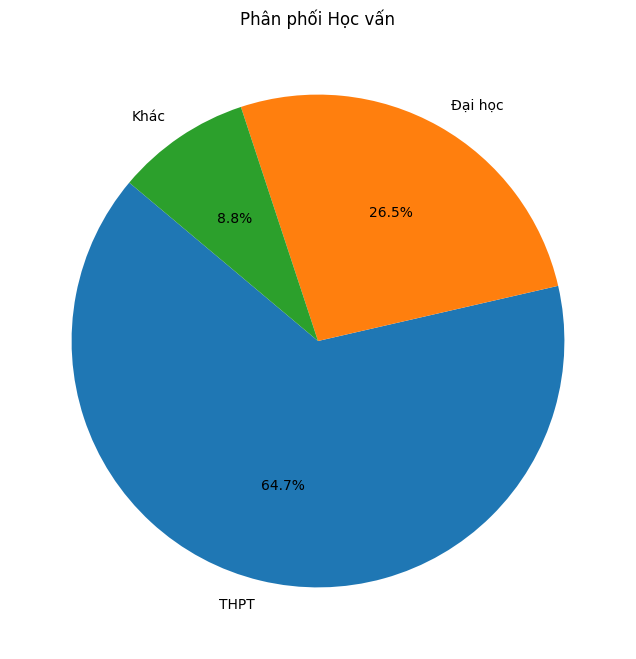

In [55]:
education_counts = df_reactors['Giáo Dục'].value_counts()

# Biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Phân phối Học vấn')
plt.show()